### Purpose:

The purpose of this program is to explore the Monte Carlo Method by performing simulations on the Roulette game and calculating expected profits (or losses).  

### Credit:

This program is inspired by: https://towardsdatascience.com/how-to-create-a-monte-carlo-simulation-using-python-c24634a0978a

### Introduction:

First, we introduce the rules for Roulettes. First, players will choose the type of bet they want. Then, a ball will be dropped into a spinning wheel and falls into a certain number. Players who have predicted the number where the ball falls wins.

In our program, we are assuming a American Style Roulette (with 0, 00, and numbers 1 - 36). We will refer to the website (https://www.venetianlasvegas.com/casino/table-games/roulette-basic-rules.html) for the rules payouts.  

According to the website, there are 12 different bets that you can place every spin, each with a different payout. However, for simplicity, we only simulate one type of bet:

- Single number bet (Choose 1 number from 0, 00, 1 - 36) with payout of 35 to 1

### Assumptions:

- As mentioned in the previous part, we assume an American Style Roulette (with 0, 00, and numbers 1 to 36)
- We assume that the player has a starting money of $50000
- We also assume that the player is stubborn; the player will only place the same type of bets, each time with $25 and a random choice of number (0, 00, 1 to 36), for 2000 times
- The payout is 35 to 1

In [3]:
# First, we import the necessary libraries

import matplotlib.pyplot as plt
import random
import numpy as np

In [28]:
# Then, we create a function that simulates the spinning of the roulette and produces an outcome:

# Initialize a seed
random.seed(100)

def spin():
    # We want to generate a number from 38 possible outcomes (0, 00, 1 to 36):
    # Let 37 denote 0, and 38 denote 00
    num = random.randint(1, 38)

    return num

In [37]:
# We test our type of bet: Single number bet
# We assume that the player randomly chooses a number from (0, 00, 1 to 36)
# We define wins as having more balance than initial balance after 2000 bets

def singleNumBet(simulations=5000):
    # We first declare virables in our assumption that will not change:
    bet = 25
    max_num_bets = 2000  # The times that our player will bet
    initial_balance = 50000
    payout = 35  # When you win, you receive 35 times the bet
    run_wins = []  # keep track of the wins of each run (each 2000 bets)
    runs = []  # keep track of the runs
    run_end_balances = []  # keep track of the ending balance for each runs
    bet_num = list(range(0, 2001))  # keep track of the number of bets (so that we can plot our X-axis later)
    
    # Then we run our game:
    for i in range(simulations):
        current_balance = [initial_balance]  # We keep track of our current balance as the Y-axis of our plot
        wins = 0

        for j in range(max_num_bets):
            res = spin()
            choice = random.randint(1, 38) # Again, let 37 denote 0, 38 denote 00

            if res == choice:
                current_balance.append(current_balance[j] + bet * payout)
                wins += 1
            else:
                current_balance.append(current_balance[j] - bet)

        end_balance = current_balance[-1]
        
        run_end_balances.append(end_balance)
        runs.append(current_balance)
        run_wins.append(wins)

    return runs, bet_num, run_wins, run_end_balances

In [32]:
# Initiate the simulation
runs, bet_num, run_wins, run_end_balances = singleNumBet(simulations=5000)

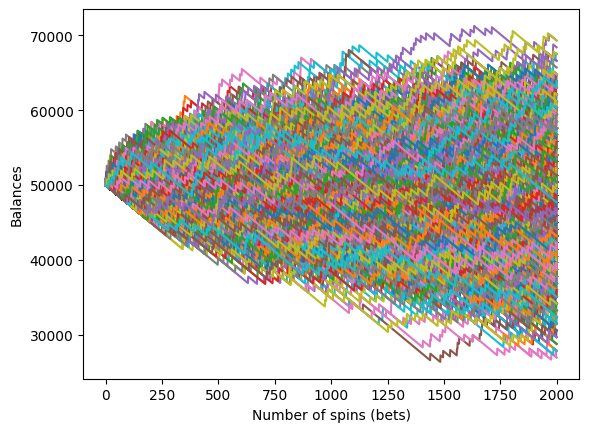

In [33]:
# Plot the graph of our simulations

for i in range(5000):
    plt.plot(bet_num, runs[i])

plt.xlabel('Number of spins (bets)')
plt.ylabel('Balances')
plt.show()

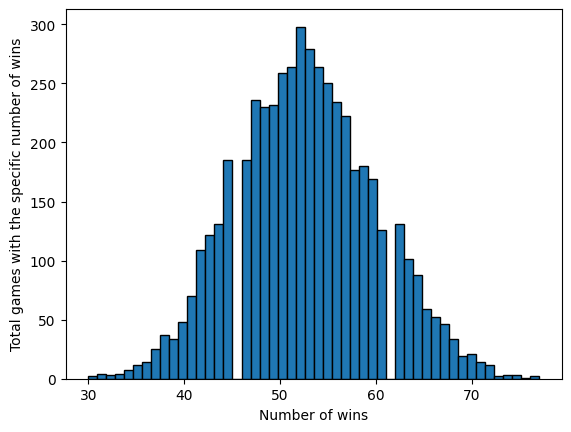

In [34]:
# Plot the number of wins
plt.hist(run_wins, bins=50, histtype='bar', ec='black')
plt.xlabel('Number of wins')
plt.ylabel('Total games with the specific number of wins')
plt.show()

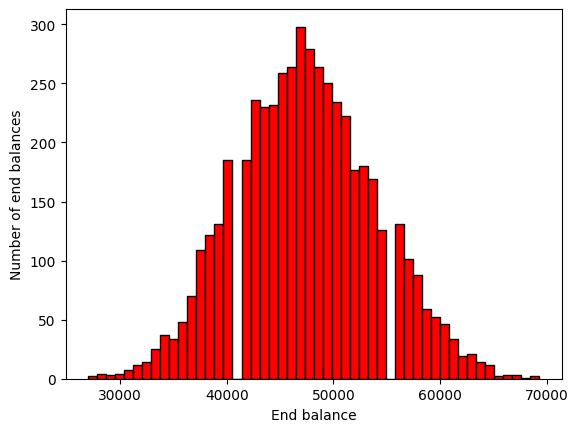

In [35]:
# Plot the end balances of each game
plt.hist(run_end_balances, bins=50, histtype='bar', ec='black', color='red')
plt.ylabel('Number of end balances')
plt.xlabel('End balance')
plt.show()

In [36]:
# Since our histogram simulation has a roughly normal distribution, we can estimate our expected value of
# profit (or in this case, loss) by simply subtracting the mean of run_end_balances from our initial balance:

print('Initial_balance is: 50000')
print('Expected wins (from simulation) for 2000 bets:', str(np.mean(run_wins)))
print('Expected ending balance (from simulation) is:', str(np.mean(run_end_balances)))
if np.mean(run_end_balances) > 50000:
    print('Expected gains (from simulation):', str(round(np.mean(run_end_balances - 50000), 2)), 'dollars')
else:
    print('Expected loss (from simulation):', str(round(50000 - np.mean(run_end_balances), 2)), 'dollars')

Initial_balance is: 50000
Expected wins (from simulation) for 2000 bets: 52.6714
Expected ending balance (from simulation) is: 47404.26
Expected loss (from simulation): 2595.74 dollars


We can try to find the theoretical expected value to see if our simulation end up similar to it.  
We know that the probability of winning a roulette using the single number bet is $ \frac{38 \choose 1}{38^2} $. Essentially, there are 38 outcomes where the player succeeds predicting the outcome (0, 00, 1 to 36), and $ 38^2 = 1444 $ total outcomes.

Let $ x $ denote the number of wins per game (where the player bets 2000 times). Then, in a trial where the player bets 2000 times and follows everything in our assumption, the probability function of wins is:  

$$ P \{ X = x \} = (\frac{38 \choose 1}{38^2})^x (1 - \frac{38 \choose 1}{38^2})^{2000 - x} = (\frac{1}{38})^x (\frac{37}{38})^{2000 - x} $$  

Since the expected value of a binomial distribution is $ np $, we calculate:

$$ E(Wins) = 2000 * \frac{1}{38} = 52.63157894736842 $$

Our expected balance after 2000 bets follows:

$$ E(End \space balance) = 50000 - 25 * 2000 + 25 * 36 * E(Wins) = 47368.42105263157 \approx 47368.421, $$
$$ E(Expected \space loss) = 50000 - E(End \space balance) = 50000 - 47368.421 = 2631.579 $$

where 36 is our payout ratio plus our bet (which will be returned to us if we win).

We can see that the theoretical expected values are all really close to our expected values from simulation.